In [1]:
import sys
sys.path.append('pyFiles')
from singleAgentEnv import GraphEnv
import networkx as nx
import pprint
import numpy as np

In [2]:
env = GraphEnv()
print(env.state)

(0.20552139150292098, 0.554666334735012)


### 1. Define the state transition probability
State transition probablility is the "probability" of transitioning to the particular state(s') when an action(a) is chosen. \
This is in the case that if we choose to move to a particular node( moving to state(s') from state(s) ), there is a probability that we are not able to move to that node. \
Since, that is not the case here and \
**Choosing an action makes us move to next the node at all times the state transition function is 1 in all cases.** 


In [3]:
stt_transition_prob = 1

### 2. Initialize the value function
Initially, the value for all states is 0 
> The number of nodes(states) in the environment is given by (environment object).g_no_node .<br>
> Each state corresponds to a state value and there are ( (environment object).g_no_node ) no of steps .

In [4]:
print (env.g_no_node)
value_func = [0] * env.g_no_node
print(value_func)

13
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### 3. Initialize the policy
Policy is the probability distribution of taking an action(a) given the current state(s). <br>
As we cannot choose action by ourself, the computer has to do it 😂 <br>
we should give a certain probability for the system to choose action according to the state <br>
We are dumb people so we set it to 1/3 as descrete values for all transitions <br>
so that the computer chooses action with equal probability 
<br>
<br>
As every state action pair has to have a probability of transitions, maybe defining a ...d matrix works

| State/Action | 0 | 1 | 2 |
| --- | --- | --- | --- |
| 0 | 1/3 | 1/3 | 1/3 |
| 1 | 1/3 | 1/3 | 1/3 |
| 2 | 1/3 | 1/3 | 1/3 |
| 3 | 1/3 | 1/3 | 1/3 |
| 4 | 1/3 | 1/3 | 1/3 |
| ... | 1/3 | 1/3 | 1/3 |

<br>
As the state are described in discrete integer values, this table can be defined in such manner

In [5]:
# the matrix defines the probablity of choosing an action
no_of_actions = 3
policy = np.ones((env.g_no_node,no_of_actions))/no_of_actions
print(policy)

[[0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]]


### 4. Write the action value function
This action value function returns the return/value of taking an action(a) at state(s) following a policy $\pi$ <br>
and with the current value data (that we defined previously)
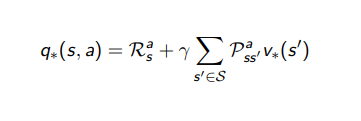
yo function le chahi euta action lida ko value calculate garcha <br>
tyo constant gamma $\gamma$ = 0.9 rakhda huncha pachi kun chahi le ramro value dincha tei anusar change garaunla

In [6]:
# takes in state and the action and returns the value
def q_val(env,state,action,value_func):
    env.state = state
    n_state,reward,done,info = env.step(action)
    state_val = value_func[env.node_inv_dict[n_state]]
    env.reset()
    return reward + 0.9*state_val


In [7]:
# testing
# for initial state

state = env.reset()
action = 0
print(q_val(env,state,action,value_func))


-2.0


### 5. Write the state value function
The state value function gives the value of the current state
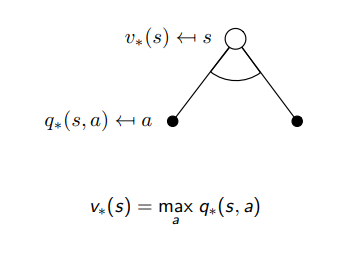
aba tyo agi calculate gareko q value haru bata sabai bhanda badi kun huncha tyo linu paryo <br>
tyo value haru ko maximum<br>
hamro assumption esma sabai bhanda ramro step ko value nai tyo state ko value ho bhanne ho 

In [8]:
no_of_actions = 3
def s_val(env,state,value_func):
    q_values = []
    action = 0
    for neighbor in env.g_env.neighbors(state):
        q_values.append(q_val(env,state,action,value_func))
        action += 1
    return max(q_values)



In [9]:
# testing
# for initial state

state = env.node_list[2]
print (state)
print(s_val(env,state,value_func))


(0.6912996529354414, 0.14621566078753526)
-2.0


### 6. Single sweep of value iteration
What were going to do here is run the value function for each possible states,<br>
**to find the value of each state**
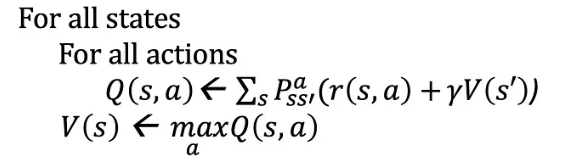
We are later on going to use values for determining the best step

##### NOTE : here, the value of the goal state is forcefully set to 0 as it causes problems

In [10]:
# here we iterate values for all states/nodes
# taking the nodes in integer format
def single_sweep(env,value_func):
    # initializing a temporary value function so that the value function does not use the new values of value function
    # before the complete new value function is formed
    temp_value_func = [0] * env.g_no_node    
    for i in range(env.g_no_node): 
        # Converting the indexed state of node to proper usable state
        state = env.node_list[i]
        # Updating the temp_value_function for the ith index
        temp_value_func[i] = s_val(env,state,value_func)
    temp_value_func[2] = 0
    return temp_value_func

In [11]:
# testing
# for initial state
value_func = [0] * env.g_no_node
state = env.reset()
pprint.pprint(value_func)  # old value function
pprint.pprint(single_sweep(env,value_func)) # New value function

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[-2.0, 20.0, 0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0]


### 7. Value iteration until convergence
Here, we are going to repeat step 6 until the value converges to within certain $\delta$ value <br>
suppose $\delta$ = 0.1 ( arbitary value )
on top of no 6 define a difference variable that takes the difference of old value and new value <br>
repeat the sweep while the difference is more than the given $\delta$ <br>
---
Note: Some problem may arise, try troubleshooting it

In [12]:
value_func = [0] * env.g_no_node
delta = 0.001 
diff = 1000
while (diff > delta):
    temp_value_func = value_func
    value_func = single_sweep(env,value_func)
    temp_diff = 0;
    for index in range(len(value_func)):
        temp_diff += abs(temp_value_func[index]-value_func[index])
    diff = temp_diff
print(value_func)
    

[16.0, 20.0, 0, 12.4, 12.4, 16.0, 9.16, 6.244, 9.16, 6.244, 12.4, 9.16, 6.244]


### 8. Use the values obtained to set the policy 
#### Such that the policy takes the optimal choice, according to the state that it is in <br>
Chooses the optimal policy implies that the policy gives a probability of 1 for the action with the highest value(action value)
and 0 for the rest of the actions. <br>
There might have been case where multiple actions might have the same value. But, for our case, suppose that all actions have different q value. Hence always having an action with a highest q value ( One Solution ) <br>

In [13]:
temp_policy = np.zeros((env.g_no_node))
for i in range(env.g_no_node):
        q_values = []
        state = env.node_dict[i]
        action = -1 
        for neighbor in env.g_env.neighbors(state):
            action += 1
            q_values.append(q_val(env,state,action,value_func))
        max_val = max(q_values)
        req_index = q_values.index(max_val)        
        temp_policy[i] = req_index 
print(temp_policy)

[0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1.]


### 9. Implement the Policy
Implement the policy and render the output similar to the last cell in "SingleAgentEnv.ipynb" file.<br>
note Render is done by the temp_render function

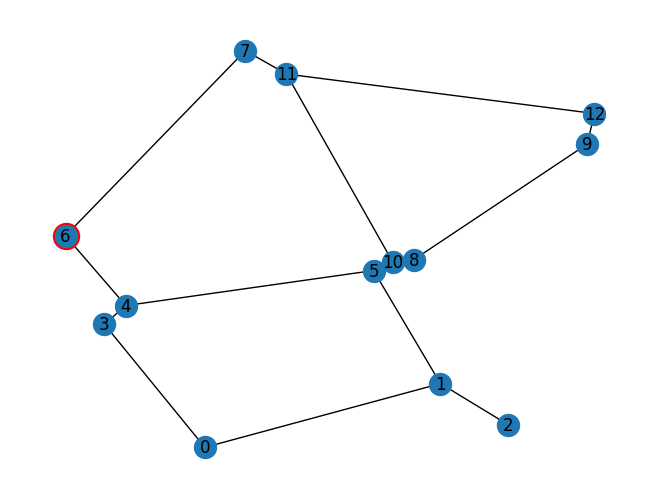

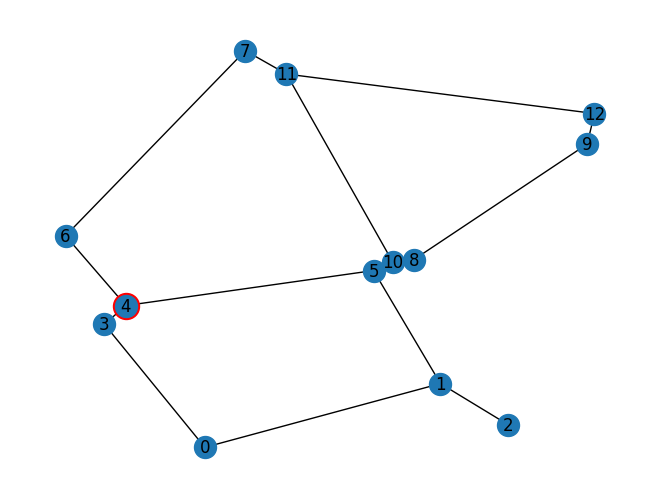

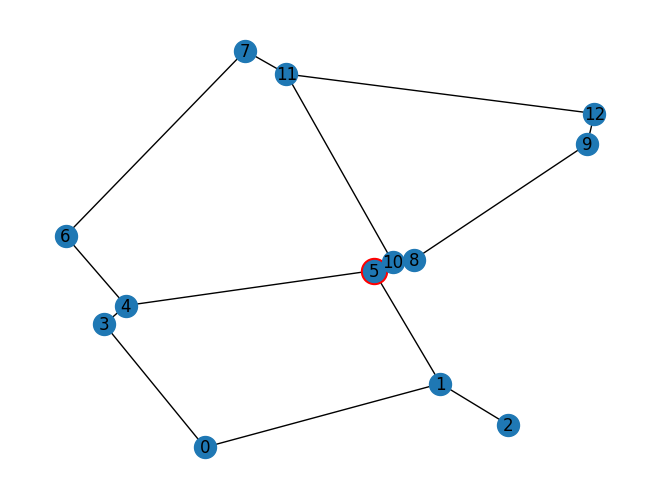

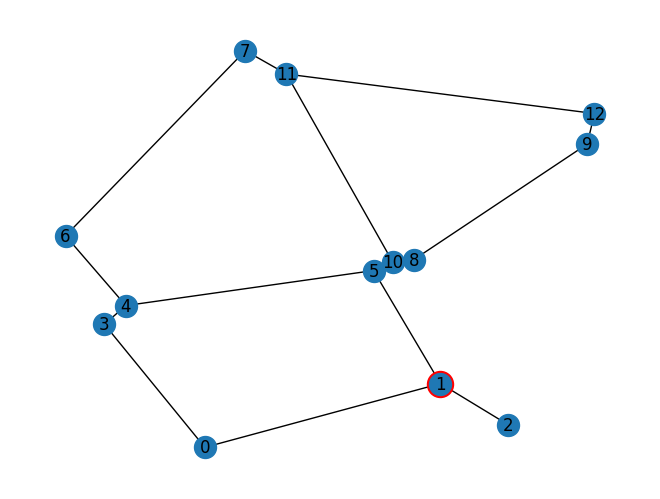

terminating episode = 4


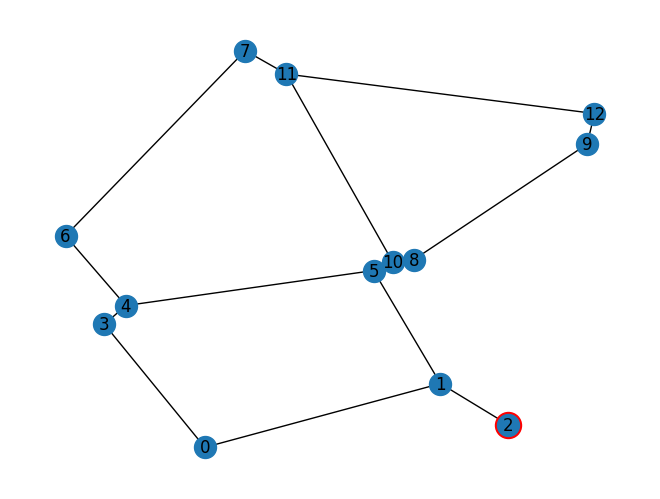

Episode: 1 Score: 14 



In [14]:
episodes = 1
for episode in range(1,episodes+1):
    state = env.reset()
    done = False
    score = 0
    while (not done) and env.step_now<10:
        env.temp_render(episode)
        action = int(temp_policy[env.node_inv_dict[env.state]])
        n_state,reward,done,info = env.step(action)
        if (done == True):
            print('terminating episode = {}'.format(env.show_step()))
        score += reward
    env.temp_render(episode)
    print('Episode: {} Score: {} \n'.format(episode,score))